We have been provided with an extensive set of used car listings from eBay in order to analyze them for different features. First, we'll need to clean some of the data in order to standardize it and prepare it for our various analyses. 

In [23]:
import numpy as np
import pandas as pd 

autos = pd.read_csv("autos.csv", encoding = "Latin-1")

In [24]:
autos

print(autos.info())

print(autos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [25]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [26]:
col_edit = ['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuelType', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postalCode',
       'lastSeen']

autos.columns = col_edit

print(autos.head())

           dateCrawled                                               name  \
0  2016-03-26 17:47:46                   Peugeot_807_160_NAVTECH_ON_BOARD   
1  2016-04-04 13:38:56         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  2016-03-26 18:57:24                         Volkswagen_Golf_1.6_United   
3  2016-03-12 16:58:10  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4  2016-04-01 14:38:50  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   

   seller offerType   price   abtest vehicleType  registration_year  \
0  privat   Angebot  $5,000  control         bus               2004   
1  privat   Angebot  $8,500  control   limousine               1997   
2  privat   Angebot  $8,990     test   limousine               2009   
3  privat   Angebot  $4,350  control  kleinwagen               2007   
4  privat   Angebot  $1,350     test       kombi               2003   

     gearbox  powerPS   model   odometer  registration_month fuelType  \
0    manuell      158  andere  150,00

Using the DataFrame.columns attribute, we renamed some of the columns in order to condense and more clearly parse what data they contained. "notRepairedDamage" is stilted and difficult to understand, whereas "unrepaired_damage" is straightforward, and our eyes can very easily relate the underscore to a space.

In [27]:
print(autos.describe(include = "all"))

                dateCrawled         name  seller offerType  price abtest  \
count                 50000        50000   50000     50000  50000  50000   
unique                48213        38754       2         2   2357      2   
top     2016-03-30 17:37:35  Ford_Fiesta  privat   Angebot     $0   test   
freq                      3           78   49999     49999   1421  25756   
mean                    NaN          NaN     NaN       NaN    NaN    NaN   
std                     NaN          NaN     NaN       NaN    NaN    NaN   
min                     NaN          NaN     NaN       NaN    NaN    NaN   
25%                     NaN          NaN     NaN       NaN    NaN    NaN   
50%                     NaN          NaN     NaN       NaN    NaN    NaN   
75%                     NaN          NaN     NaN       NaN    NaN    NaN   
max                     NaN          NaN     NaN       NaN    NaN    NaN   

       vehicleType  registration_year  gearbox       powerPS  model  \
count        449

There are multiple columns with very few values that are candidates for deletion. The "seller" column has only two different values, but the frequency for "private" is just one less than the total, so we are gaining essentially no information by including it in the model. The same goes for "offerType." There are some columns that have only two different values, but they are important to include in the model. For example, most of the cars do not have any damage, but some of them do, which probably has a significant impact on the price of the vehicle. Similarly, it is important to know if the car has a manual or automatic transmission, which is represented by the "gearbox" column.

The registration month column appears to have sets of conflicting information. Since it produced values for the summary statistics, we can infer that there are some numerical values. This is supported especially by the maximum of "12," which represents the month of December. Additionally, "powerPS" and "num_photos" appear to be stored as float values with some missing information, and need to be investigated further.

It appears as though "price" and "odometer" are numeric values that are stored as text, as there were no summary statistics calculated for them, whereas those are among the most important numerical traits a car can have when evaluating its sale price.

In [28]:
autos["num_photos"].value_counts()

0    50000
Name: num_photos, dtype: int64

Since this column is just "0" appearing 5,000 times, we can certainly delete it.

In [29]:
autos = autos.drop(columns = ["seller", "offerType", "num_photos"])

In [30]:
print(autos["price"].unique())

['$5,000' '$8,500' '$8,990' ... '$385' '$22,200' '$16,995']


In the above cell, we observe that the "price" column contains non-numeric characters ($ and ,) that must be removed

In [31]:
autos["price"] = autos["price"].str.replace("$","").str.replace(",","")
autos["price"]= autos["price"].astype(float)

In [32]:
print(autos["odometer"].unique())

['150,000km' '70,000km' '50,000km' '80,000km' '10,000km' '30,000km'
 '125,000km' '90,000km' '20,000km' '60,000km' '5,000km' '100,000km'
 '40,000km']


In [33]:
autos["odometer"]= autos["odometer"].str.replace(",","").str.replace("km","").astype(int)

autos.rename({"odometer":"odometer_km"}, axis = 1, inplace = True)

autos["odometer_km"].head()


0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

In [38]:
# analyzing the price data

print(autos["price"].unique().shape)
print(autos["price"].describe())

autos["price"].value_counts().head(10)

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


0.0       1421
500.0      781
1500.0     734
2500.0     643
1200.0     639
1000.0     639
600.0      531
800.0      498
3500.0     498
2000.0     460
Name: price, dtype: int64

The most common price in the listings is 0 USD, which makes very little sense. There are 1421 listings with a price of 0 USD out of the 50,000 listings, which will significantly skew the mean to the left. The mean that is reported for the 50,000 listings is 9,840 USD. On the surface, this doesn't seem out of the ordinary, but because approximately 2 percent of the data are zeroes, the mean with those excluded should be significantly higher. Indeed, the maximum we observe in the data set is 100,000,000 USD!

In [39]:
autos["price"].value_counts().sort_index(ascending = False).head(10)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
Name: price, dtype: int64

These are exorbitant prices for used cars. We need to go down even further to find reasonable observations to include in our analysis.

In [40]:
autos["price"].value_counts().sort_index(ascending = False).head(25)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
194000.0      1
190000.0      1
180000.0      1
175000.0      1
169999.0      1
Name: price, dtype: int64

Now, 350,000 USD is a great deal to pay for a used car, but it may have distinguishing features that separate it from a run of the mill car that we would observe in our day-to-day lives. Indeed, we observe a fairly consistent ascending rate through the upper 1-200,000 USD marks, but after 350,000 USD the prices cross the ~1mil USD threshold and we can comfortably exclude them. Now we should turn to the opposite end of the range to analyze the inexpensive listings.

In [41]:
autos["price"].value_counts().sort_index().head(25)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
40.0       6
45.0       4
47.0       1
49.0       4
50.0      49
Name: price, dtype: int64

As addressed earlier, the listings at 0 USD seem superfluous and are doing much more harm to the data set than good. If the prices were coming from used car listings from lots, we would seek to eliminate many of the other listings we obesrve here, but since eBay is an auction site, we don't have the granularity to distinguish between listings that start at 1 USD erroneously or listings that simply start at 1 USD because the owner opted to do so. Therefore, we should prune the 0 USD listings, and everything above 350,000 USD.

In [42]:
autos = autos[autos["price"].between(1,350001)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

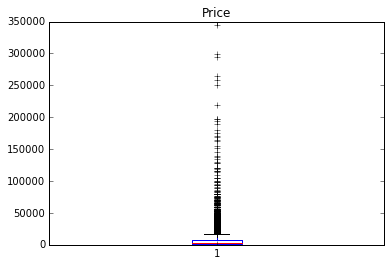

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib

fig1,ax1 = plt.subplots()

ax1.set_title("Price")
ax1.boxplot(autos["price"])
plt.show()

The minimum and maximum values match the bounds we created for our data set. The median value of 3,000 USD and the mean value of ~5,900 USD indicate that there is right skew in the data set, which is certainly to be expected given the firm lower bound of 1 and the extremely expensive cars in the data set. However, the data is much more sensible, and even though we had multiple zeroes in the data set, we observe that cutting the extraneous values from both tails gives us a much better indication of where the data is centered.

150000    31414
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
5000        836
40000       815
30000       780
20000       762
10000       253
Name: odometer_km, dtype: int64
count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64


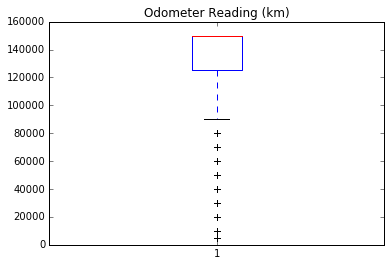

In [59]:
#odometer data analysis
print(autos["odometer_km"].value_counts())
print(autos["odometer_km"].describe())

fig2,ax2 = plt.subplots()

ax2.set_title("Odometer Reading (km)")
ax2.boxplot(autos["odometer_km"])
plt.show()

The odometer data is much more nicely behaved. We observe an enormous concentration of the data at the 150,000 km mark, with over half of the data meeting the maximum value. The lack of granularity and distinct values probably indicates that there are preset values to choose from, and that there are vastly more cars with many km on them than with little km on them in the data set. The boxplot indicates multiple outliers according to the IQR rule, but they are important to include in the data set as they do not obfuscate the concentration at the high end while providing important information about how many cars are offered with fewer miles on them.

# Date Analysis

In [71]:
autos[['dateCrawled','ad_created','lastSeen']][0:10]

,dateCrawled,ad_created,lastSeen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50
5,2016-03-21 13:47:45,2016-03-21 00:00:00,2016-04-06 09:45:21
6,2016-03-20 17:55:21,2016-03-20 00:00:00,2016-03-23 02:48:59
7,2016-03-16 18:55:19,2016-03-16 00:00:00,2016-04-07 03:17:32
8,2016-03-22 16:51:34,2016-03-22 00:00:00,2016-03-26 18:18:10
9,2016-03-16 13:47:02,2016-03-16 00:00:00,2016-04-06 10:46:35


### I) Date Crawled

In [67]:
print(autos["dateCrawled"].str[:10]
                        .value_counts(normalize = True, dropna = False)
                        .sort_index())

print(autos["dateCrawled"].str[:10]
                        .value_counts(normalize = True, dropna = False)
                        .sort_values())

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: dateCrawled, dtype: float64
2016-04-07    0.001400
2016-04-06    0.003171
2016-03-18    0.012911
2016-04-05    0.013096
2016-03-06    0.014043
2016-03-13    0.015670
2016-03-05    0.025327
2016-03-24    0.029342


The crawler recorded data for a little over a month from 03/05 to 04/07, and there are no apparent trends in daily usage.

### ii) Ad Created

In [68]:
print(autos["ad_created"].str[:10]
                        .value_counts(normalize = True, dropna = False)
                        .sort_index())

print(autos["ad_created"].str[:10]
                        .value_counts(normalize = True, dropna = False)
                        .sort_values())

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
2015-12-30    0.000021
2016-01-03    0.000021
2016-01-07    0.000021
2016-01-10    0.000041
2016-01-13    0.000021
2016-01-14    0.000021
2016-01-16    0.000021
2016-01-22    0.000021
2016-01-27    0.000062
2016-01-29    0.000021
2016-02-01    0.000021
2016-02-02    0.000041
2016-02-05    0.000041
2016-02-07    0.000021
2016-02-08    0.000021
2016-02-09    0.000021
2016-02-11    0.000021
2016-02-12    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2016-02-17    0.000021
2016-02-18    0.000041
2016-02-19    0.000062
2016-02-20    0.000041
2016-02-21    0.000062
                ...   
2016-03-09    0.033151
2016-03-10    0.031895
2016-03-11    0.032904
2016-03-12    0.036755
2016-03-13    0.017008
2016-03-14    0.035190
2016-03-15    0.034016
2016-03-16    0.030125
2016-03-17    0.031278
2016-03-18    0.013590
2016-03-19    0.033687
2016-03-20    0.037949
2016-03-21 

The advertisements seem to be only loosely linked to the listings, as the dates overlap with the crawler in some spots but several older dates are also included.

### iii) Last Seen

In [74]:
print(autos["lastSeen"].str[:10]
                        .value_counts(normalize = True, dropna = False)
                        .sort_index())

print(autos["lastSeen"].str[:10]
                        .value_counts(normalize = True, dropna = False)
                        .sort_values())

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: lastSeen, dtype: float64
2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-18    0.007351
2016-03-08    0.007413
2016-03-13    0.008895
2016-03-09    0.009595
2016-03-10    0.010666
201

We can attribute the disproportionate right skew at the end to the crawler ceasing activity and not to any actual sales data.

### iv) Registration Year 

In [75]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

There are obviously some problems with the data, as cars from 1000 and 9999 CE certainly don't match up with our expectations.

In [76]:
autos["registration_year"].value_counts(ascending = False)

2000    3156
2005    2936
1999    2897
2004    2703
2003    2699
2006    2670
2001    2636
2002    2486
1998    2363
2007    2277
2008    2215
2009    2085
1997    1951
2011    1623
2010    1589
2017    1392
1996    1373
2012    1310
1995    1227
2016    1220
2013     803
2014     663
1994     629
2018     470
1993     425
2015     392
1992     370
1990     347
1991     339
1989     174
        ... 
1950       3
9999       3
1800       2
1951       2
1941       2
1934       2
1954       2
1957       2
1955       2
2019       2
1001       1
1939       1
4500       1
1953       1
1111       1
4800       1
5911       1
1943       1
1938       1
1929       1
2800       1
6200       1
4100       1
8888       1
1927       1
9000       1
1948       1
1000       1
1931       1
1952       1
Name: registration_year, Length: 95, dtype: int64

Looks like there's some cleaning to do! Since the cars are listed in 2016, the maximum year we should allow is 2017 (given that model years are typically 1 ahead of the current year.) The minimum value isn't as straightforward. The Ford Model T was released in the early 20th century, and while I don't anticipate too many to be sold on eBay, we can err on the side of caution without perturbing the true center of the data.

In [78]:
autos = autos[autos["registration_year"].between(1907,2017)]
autos["registration_year"].value_counts(normalize=True).head(25)

2000    0.065650
2005    0.061074
1999    0.060263
2004    0.056227
2003    0.056144
2006    0.055541
2001    0.054833
2002    0.051713
1998    0.049154
2007    0.047365
2008    0.046076
2009    0.043372
1997    0.040584
2011    0.033761
2010    0.033054
2017    0.028956
1996    0.028561
2012    0.027250
1995    0.025524
2016    0.025378
2013    0.016704
2014    0.013792
1994    0.013084
1993    0.008841
2015    0.008154
Name: registration_year, dtype: float64

In [79]:
autos["registration_year"].describe()

count    48073.000000
mean      2003.318724
std          7.464077
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2017.000000
Name: registration_year, dtype: float64

The vast majority of the cars were registed in the last 20-25 years, and the data set contains realistic values fairly tightly packed around the early 21st century. 

# Brand Analysis

In [89]:
autos["brand"].value_counts(normalize = True)

volkswagen        0.212593
bmw               0.108814
opel              0.108377
mercedes_benz     0.095896
audi              0.086098
ford              0.069831
renault           0.047677
peugeot           0.029601
fiat              0.025836
seat              0.018618
skoda             0.016163
nissan            0.015310
mazda             0.015248
smart             0.014312
citroen           0.014104
toyota            0.012668
hyundai           0.009985
sonstige_autos    0.009631
volvo             0.009090
mini              0.008695
mitsubishi        0.008154
honda             0.007905
kia               0.007114
alfa_romeo        0.006636
porsche           0.005949
suzuki            0.005866
chevrolet         0.005637
chrysler          0.003515
dacia             0.002663
daihatsu          0.002496
jeep              0.002226
subaru            0.002101
land_rover        0.002059
saab              0.001623
daewoo            0.001560
jaguar            0.001519
trabant           0.001394
r

There appears to be a significant drop-off in the data below the 5\% threshold, so we'll stick to the brands that comprise of at least 5 percent of all the data collected. This includes some well-known car manufacturers around the world, predominantly German, but also some localized to non-US regions (Opel is not a common brand in the United States).

In [117]:
brand_pct = autos["brand"].value_counts(normalize = True)
brand_over5pct = brand_pct[brand_pct > .05].index


                           

In [125]:
brand_mean_price = {}

for brand in brand_over5pct:
    brand_data = autos[autos["brand"] == brand]
    brand_mean = brand_data["price"].mean()
    brand_mean_price[brand] = int(brand_mean)

print(brand_mean_price)


{'mercedes_benz': 8528, 'volkswagen': 5351, 'opel': 2952, 'audi': 9239, 'ford': 3732, 'bmw': 8284}


There are clear discrepancies in the average price among each group. The Mercedes-Benz, BMW, and Audi all have average prices well over 8,000 USD, whereas Opel and Ford are both below 4,000 USD The Volkswagen brand occupies a middle ground at ~5300 USD. We would need to analyze the data further to actually know if the cost is a signal of the quality.

# Mean Mileage & Price

In [133]:
brand_mean_mileage = {}

for brand in brand_over5pct:
    brand_data = autos[autos["brand"] == brand]
    brand_mean = brand_data["odometer_km"].mean()
    brand_mean_mileage[brand] = int(brand_mean)
    
bmp_series = pd.Series(brand_mean_price)
bmm_series = pd.Series(brand_mean_mileage)

top5_data = pd.DataFrame(bmp_series, columns = ["mean_price"])

top5_data["mean_mileage"] = bmm_series

top5_data

,mean_price,mean_mileage
audi,9239,129406
bmw,8284,132666
ford,3732,124255
mercedes_benz,8528,130962
opel,2952,129415
volkswagen,5351,128928


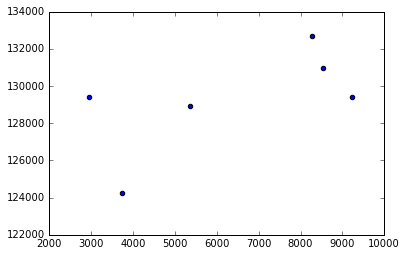

In [134]:
plt.scatter(top5_data["mean_price"],top5_data["mean_mileage"])
plt.show()

The sample size is obviously very small, but we do see a general upward trend- the more expensive brands tend to have higher average odometer readings when put on eBay for auction. Two causes immediately jump out- one is that, the more expensive brands have higher quality parts, design, labor, etc., and therefore tend to last longer and be more reliable as they age. Another potential cause is consumption substitution due to income changes. As workers accrue wages, it is possible that they opt to "trade up" and trade in their lower-cost cars for higher-cost models. I would not expect this to be the primary driving force, but it is certainly a factor to consider, especially as we would not expect many consumers to be able to trade up from the price point of a Mercedes-Benz or BMW.